In [1]:
# Import all the libraries
import os
import itertools
import pandas as pd
import string
import nltk
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pandas import DataFrame
from functools import reduce

$$\text{Pre-Process the Data}$$

In [2]:
#Pre-processing of the data
#It returns a list of all words in an email including numbers 
def prepare_the_data(fname):
    flist = open(fname,errors="surrogateescape").readlines()
    ls= [s.rstrip('\n') for s in flist]
    s=[]
    for i in ls:
        s.append(i.split())
    s= list(itertools.chain(*s))
    
    #text converted to lower case
    lst = [x.lower() for x in s]
    
    # Removes the puctuation: !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
    lst = [''.join(c for c in s if c not in string.punctuation) for s in lst]
    
    # Removes the empty strings
    lst = [s for s in lst if s]
    
    return lst

List of lists of Spam/Ham Emails for Dataset.

In [3]:
# It creates a nested list for all the emails in a folder
# e.x. Train_spam(a directory) contains 123 emails, it creates a nested list of size 123.
def extract_data(dir_name,l):
    for entry in os.listdir(dir_name):
        path = os.path.join(dir_name,entry)
        l.append(prepare_the_data(path))

Generate the dictionary for Training Data

In [4]:
# Learning Model
# Generate the dictionary for Training Data
# It will give all the unique words and count the number of occurences of each word
# It will take the nested list as input, for train_spam_list and train_ham_list
def generate_dictionary(lst):
    # chnage the nested list to one single list
    single_list = reduce(lambda x,y: x+y, lst)
    
    #count the no of unique words
    uniqueWordCount = 0
    count = {}
    for word in single_list:
        if word in count :
            count[word] += 1
        else:
            count[word] = 1
    return(count)

$$\text{Training  the Naïve Bayes Classifiers}$$

In [5]:
# Using add-one smoothing.
# Calculate the conditional probability of a word given the class. (P(w|c)).
# For each class returns a dictionary of words as keys and prob of word given class as value. 
def compute_conditional_probability(dictionary,vocubalary):
    log_prob_word_class = {}
    v_wc = len(vocubalary)
    #print("No of words in the vocubalray: " + str(v_wc))
    class_wc = sum(dictionary.values())
    for word in vocubalary:
        count_word_class = dictionary.get(word) if dictionary.get(word)!=None else 0
        log_prob_word_class[word] = np.log(count_word_class+1/(class_wc+v_wc))
    return log_prob_word_class

In [6]:
#Train the naive Bayes
def train_naive_bayes(spam_dict,ham_dict,spam_list,ham_list):
    
    # Extract vocublary of the training dataset
    # v_wc - no of words in the vocabulary
    vocubalary = set(([*spam_dict,*ham_dict]))
     
    # N_c = No of emails in the training dataset classified as c where c is either ham or spam
    N_spam = len(spam_list)
    N_ham = len(ham_list)
    # N_doc = NO of emails in the training dataset
    N_doc = len(spam_list)+len(ham_list)
                   
    # Log probabiloty of classes ham and spam
    prior_ham = np.log(N_ham/N_doc)
    prior_spam = np.log(N_spam/N_doc)
#     print("Prior probability of ham: "+str(np.exp(prior_ham)))
#     print("Prior probability of spam: "+str(np.exp(prior_spam)))
    
    # Conditional Probability of each word in vocubalary given class(ham or spam)
    log_prob_word_spam = {}
    log_prob_word_ham = {}
    log_prob_word_spam = compute_conditional_probability(spam_dict,vocubalary)
#     print(log_prob_word_spam.get('are'))
    log_prob_word_ham = compute_conditional_probability(ham_dict,vocubalary)
#     print(log_prob_word_ham.get('are'))
    
    return prior_ham,prior_spam,log_prob_word_ham,log_prob_word_spam

$$\text{Evaluating the Naive Bayes Model for Test Data}$$

In [7]:
#Naive Bayes Classifier for Test Data
def naive_bayes_classifier(org_class_name,ls,spam_dict,ham_dict,spam,ham):
    for email in org_class_name:
        prob_spam = spam
        prob_ham = ham
        for word in email:
            try: 
                prob_spam += spam_dict.get(word) if spam_dict.get(word)!=None else 0
            except:
                prob_spam +=np.log(1)
            try:
                prob_ham += ham_dict.get(word) if ham_dict.get(word)!=None else 0
            except KeyError:
                prob_ham += np.log(1)
        if (prob_ham)>(prob_spam):
            ls.append('ham')
        else:
            ls.append('spam')

$$\text{Remove Stopwrods}$$

In [8]:
# Remove stop words
# Takes input a nested list
# returns a nested list after removing the stop words
def remove_stop_words(dic):    
    stopwords = open("stopwords.txt",errors="surrogateescape").readlines()
    stopwords= [s.rstrip('\n') for s in stopwords]
    for word in stopwords:
        if(word in dic.keys()):
            #print(word)
            del dic[word]
        
    return dic

$$\text{Visulaize the Data}$$

In [9]:
#Visualize the data
# input - a nested list
def visulaize_data(lst):
    words = reduce(lambda x,y: x+y, lst)
    #words_spam=list(filter(('subject').__ne__, words_spam))
    df = DataFrame (words,columns=['words'])
    text = " ".join(review for review in df.words)
    wc = WordCloud(width=512,height=512).generate(text)
    plt.figure(figsize=(10,8),facecolor='k')
    plt.imshow(wc)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

No of emails tagged as spam:123


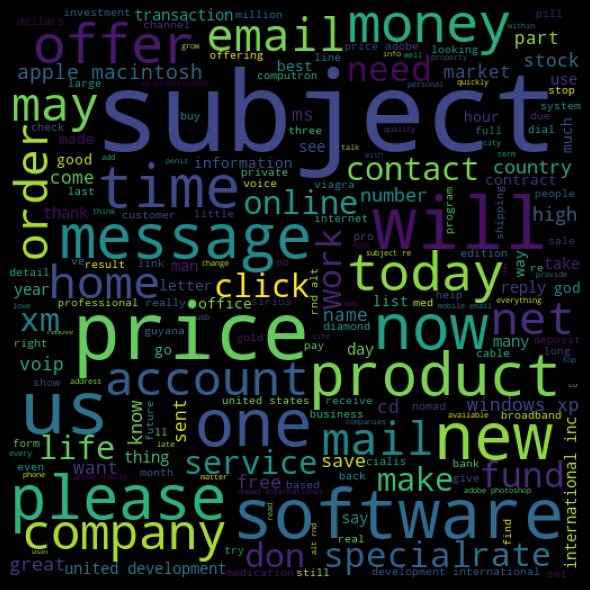

No of unique words in train/spam :6256
No of unique words in train/spam without stop words :6139
No of emails tagged as ham:340


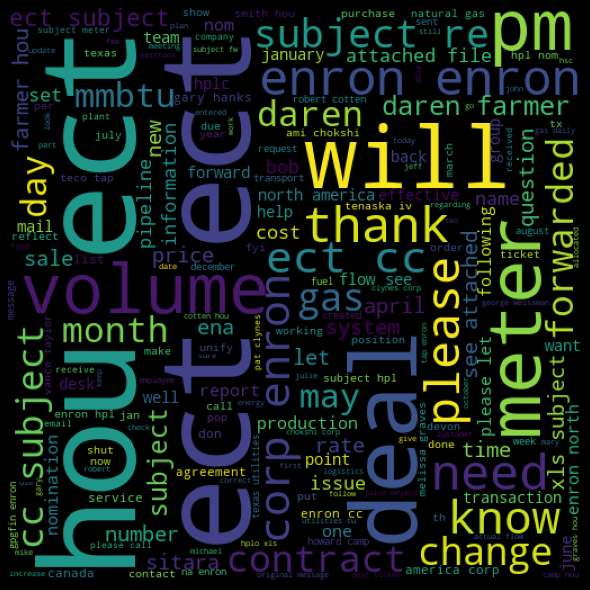

No of unique words in train/ham :5874
No of unique words in train/ham without stop words :5753


In [10]:
################################################# !!!!!SPAM!!!!! ##################################################
# Train spam List
train_spam = 'corpus/train/spam' ####### Enter where your spam folder is located
train_spam_list = []
#pre process the data
extract_data(train_spam,train_spam_list)
print("No of emails tagged as spam:" + str(len(train_spam_list)))
visulaize_data(train_spam_list)

#Genearte a dictionary of unique words and their count for spam with and without stop words
train_spam_dict = generate_dictionary(train_spam_list)
print("No of unique words in train/spam :" + str(len(train_spam_dict)))
train_spam_dict_without_stopwords = train_spam_dict.copy()
train_spam_dict_without_stopwords = remove_stop_words(train_spam_dict_without_stopwords)
print("No of unique words in train/spam without stop words :" + str(len(train_spam_dict_without_stopwords)))

################################################# !!!!!HAM!!!!! ##################################################
# Train spam List
train_ham = 'corpus/train/ham' ####### Enter where your ham folder is located
train_ham_list = []
#pre process the data
extract_data(train_ham,train_ham_list)
print("No of emails tagged as ham:" + str(len(train_ham_list)))
visulaize_data(train_ham_list)

#Genearte a dictionary of unique words and their count for spam with and without stop words
train_ham_dict = generate_dictionary(train_ham_list)
print("No of unique words in train/ham :" + str(len(train_ham_dict)))
train_ham_dict_without_stopwords = train_ham_dict.copy()
train_ham_dict_without_stopwords = remove_stop_words(train_ham_dict_without_stopwords)
print("No of unique words in train/ham without stop words :" + str(len(train_ham_dict_without_stopwords)))

In [11]:
# Lets train our niave bayes model using trainind data for both with and withut stopwords

# With stop words
prior_ham,prior_spam,log_prob_word_ham,log_prob_word_spam = train_naive_bayes(train_spam_dict,train_ham_dict,train_spam_list,train_ham_list)
# print(len(log_prob_word_ham))
# print(len(log_prob_word_spam))

# Without stop words
prior_ham_sp,prior_spam_sp,log_prob_word_ham_sp,log_prob_word_spam_sp = train_naive_bayes(train_spam_dict_without_stopwords,train_ham_dict_without_stopwords,train_spam_list,train_ham_list)
# print(len(log_prob_word_ham_sp))
# print(len(log_prob_word_spam_sp))

In [12]:
def remove_stop_words_from_nested_list(ls):
    stopwords = open("stopwords.txt",errors="surrogateescape").readlines()
    stopwords= [s.rstrip('\n') for s in stopwords]
    for stop_word in stopwords:
        for email in ls:
            for word in email:
                if(word==stop_word):
                    email.remove(word)
    return ls

In [13]:
# Test spam Emails
test_spam = 'corpus/test/spam'
test_spam_list = []
#pre process the data
extract_data(test_spam,test_spam_list)
# print(len(test_spam_list))
# Without stop words
test_spam_list_withput_stop_words = test_spam_list.copy()
test_spam_list_withput_stop_words = remove_stop_words_from_nested_list(test_spam_list_withput_stop_words)

# Test Ham emails
test_ham = 'corpus/test/ham'
test_ham_list = []
#pre process the data
extract_data(test_ham,test_ham_list)
# print(len(test_ham_list))
# Without stop words
test_ham_list_withput_stop_words = test_ham_list.copy()
test_ham_list_withput_stop_words = remove_stop_words_from_nested_list(test_ham_list_withput_stop_words)

In [14]:
#contains classified output of naive_bayes_classifier for testing spam email
classifier_spam=[]
#Calling naive_bayes_classifier for testing spam emails
naive_bayes_classifier(test_spam_list,classifier_spam,log_prob_word_spam,log_prob_word_ham,prior_spam,prior_ham)

# Without stop words
classifier_spam_without_sw=[]
#Calling naive_bayes_classifier for testing spam emails
naive_bayes_classifier(test_spam_list_withput_stop_words,classifier_spam_without_sw,log_prob_word_spam_sp,log_prob_word_ham_sp,prior_spam_sp,prior_ham_sp)
# print(len(classifier_spam_without_sw))


#contains classified output of naive_bayes_classifier for testing ham email
classifier_ham=[]
#Calling naive_bayes_classifier for testing ham emails
naive_bayes_classifier(test_ham_list,classifier_ham,log_prob_word_spam,log_prob_word_ham,prior_spam,prior_ham)

# Without stop words
classifier_ham_without_sw=[]
#Calling naive_bayes_classifier for testing spam emails
naive_bayes_classifier(test_ham_list_withput_stop_words,classifier_ham_without_sw,log_prob_word_spam_sp,log_prob_word_ham_sp,prior_spam_sp,prior_ham_sp)
# print(len(classifier_ham_without_sw))

$$\text{Frequency Based Feature Selection}$$

In [15]:
# We are going to select various top % of features (words) in training dataset seperatley for spam and ham.
# percentage = 0.8, 80% of highest frequency words from the dictionary of spam and ham.
def freq_based_feature_selection(percentage,dic):
    dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}
#     print(len(dic))
    for i in range(0,len(dic)-int(np.ceil(percentage*len(dic)))):
        dic.popitem()
#     print(len(dic))
    return dic

In [16]:
accuracy = {}
accuracy_ham = {}
accuracy_spam = {}
for i in [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    
    sorted_train_spam_dict = train_spam_dict.copy()
    sorted_train_spam_dict = freq_based_feature_selection(i,sorted_train_spam_dict)
    sorted_train_ham_dict = train_ham_dict.copy()
    sorted_train_ham_dict = freq_based_feature_selection(i,sorted_train_ham_dict)

    # Train the Model
    prior_ham_fr,prior_spam_fr,log_prob_word_ham_fr,log_prob_word_spam_fr = train_naive_bayes(sorted_train_spam_dict,sorted_train_ham_dict,train_spam_list,train_ham_list)
    
    #contains classified output of naive_bayes_classifier for testing spam email
    classifier_spam_fr=[]
    #Calling naive_bayes_classifier for testing spam emails
    naive_bayes_classifier(test_spam_list,classifier_spam_fr,log_prob_word_spam_fr,log_prob_word_ham_fr,prior_spam_fr,prior_ham_fr)

    #contains classified output of naive_bayes_classifier for testing ham email
    classifier_ham_fr=[]
    #Calling naive_bayes_classifier for testing ham emails
    naive_bayes_classifier(test_ham_list,classifier_ham_fr,log_prob_word_spam_fr,log_prob_word_ham_fr,prior_spam_fr,prior_ham_fr)
    
    #Calculate the accuracy
    Accuracy_for_ham = classifier_ham_fr.count('ham')/len(classifier_ham_fr)
#     print('Accuracy for ham:'+ str(Accuracy_for_ham))
    accuracy_ham[i] = Accuracy_for_ham
    
    Accuracy_for_spam = classifier_spam_fr.count('spam')/len(classifier_spam_fr)
    accuracy_spam[i] = Accuracy_for_spam
#     print('Accuracy for spam:'+str(Accuracy_for_spam))
    
    Overall_Accuracy = (classifier_ham_fr.count('ham')+classifier_spam_fr.count('spam'))/(len(classifier_ham_fr)+len(classifier_spam_fr))
#     print('Overall Accuracy'+str(Overall_Accuracy))
    accuracy[i]=Overall_Accuracy

$$\text{Accuracy of the Naive Bayes Model for the Test Data}$$

In [17]:
def print_accuracy_of_model():
    # Accuracy of the Naive Bayes model for test data
    #Calculate the accuracy
    print("Accuracy for ham:")
    print(classifier_ham.count('ham')/len(classifier_ham))
    print("Accuracy for spam:")
    print(classifier_spam.count('spam')/len(classifier_spam))
    print('Overall Accuracy:')
    print((classifier_ham.count('ham')+classifier_spam.count('spam'))/(len(classifier_ham)+len(classifier_spam)))

In [19]:
def print_accuracy_for_stop_words():
    # Accuracy of the Naive Bayes model for test data without stop words
    # Calculate the accuracy
    print("\nAccuracy for ham without stop words:")
    print(classifier_ham_without_sw.count('ham')/len(classifier_ham_without_sw))
    print("Accuracy for spam without stop words:")
    print(classifier_spam_without_sw.count('spam')/len(classifier_spam_without_sw))
    print('Overall Accuracy without stop words:')
    print((classifier_ham_without_sw.count('ham')+classifier_spam_without_sw.count('spam'))/(len(classifier_ham_without_sw)+len(classifier_spam_without_sw)))
    
    print("\nConclusion: Removing stop words from the dataset didn't help in improving the accuracy as the no of token were "
      +" still very large, they were changed from "+str(len(log_prob_word_ham))+" to " + str(len(log_prob_word_ham_sp))+".")

In [20]:
def print_and_plt():
    print("Key Value means percentage of tokens selected from both ham and spam with higest frequency.")
    print("1 means when no features selection is done, we consider all the tokens for classification.\n")
    
    print("Overall Accuracy:")
    print(accuracy)
    list_1 = sorted(accuracy.items()) # sorted by key, return a list of tuples
    x, y = zip(*list_1) # unpack a list of pairs into two tuples
    plt.plot(x, y, label='Overall Accuracy')
    print("\nHam Accuracy")
    print(accuracy_ham)
    list_2 = sorted(accuracy_ham.items()) # sorted by key, return a list of tuples
    x, y = zip(*list_2) # unpack a list of pairs into two tuples
    plt.plot(x, y,label='Ham Accuracy')
    print("\nSpam Accuracy")
    print(accuracy_spam)
    list_3 = sorted(accuracy_spam.items()) # sorted by key, return a list of tuples
    x, y = zip(*list_3) # unpack a list of pairs into two tuples
    plt.plot(x, y, label='Spam Accuracy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    print("Conclusion: I would go with slecting 30 to 35 % of tokens with highest frequency (feature selection),"
      +" for optimizing the accuracy of"+
      " both sets of email(spam and ham) and overall accuracy as observable from the above graph.\n")

In [21]:
def what_to_print(sp,feature_selection):
    if(sp==0 and feature_selection ==1):
        print_and_plt()
    elif(sp==1 and feature_selection ==0):
        print_accuracy_of_model()
        print_accuracy_for_stop_words()
    elif(sp==1 and feature_selection ==1):
        print_and_plt()
        print_accuracy_for_stop_words()
    else:
        print_accuracy_of_model()
        

Key Value means percentage of tokens selected from both ham and spam with higest frequency.
1 means when no features selection is done, we consider all the tokens for classification.

Overall Accuracy:
{1: 0.9142259414225942, 0.9: 0.9016736401673641, 0.8: 0.9100418410041841, 0.7: 0.9163179916317992, 0.6: 0.9163179916317992, 0.5: 0.9100418410041841, 0.4: 0.9309623430962343, 0.3: 0.9351464435146444, 0.2: 0.9288702928870293, 0.1: 0.9142259414225942}

Ham Accuracy
{1: 0.9971264367816092, 0.9: 0.9942528735632183, 0.8: 0.9942528735632183, 0.7: 0.9942528735632183, 0.6: 0.9913793103448276, 0.5: 0.9913793103448276, 0.4: 0.9885057471264368, 0.3: 0.9712643678160919, 0.2: 0.9626436781609196, 0.1: 0.9425287356321839}

Spam Accuracy
{1: 0.6923076923076923, 0.9: 0.6538461538461539, 0.8: 0.6846153846153846, 0.7: 0.7076923076923077, 0.6: 0.7153846153846154, 0.5: 0.6923076923076923, 0.4: 0.7769230769230769, 0.3: 0.8384615384615385, 0.2: 0.8384615384615385, 0.1: 0.8384615384615385}


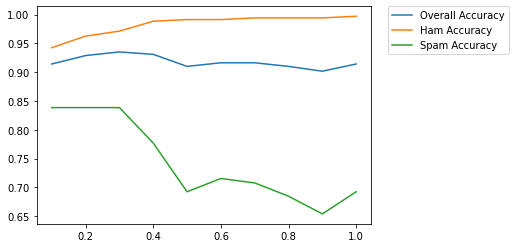

Conclusion: I would go with slecting 30 to 35 % of tokens with highest frequency (feature selection), for optimizing the accuracy of both sets of email(spam and ham) and overall accuracy as observable from the above graph.


Accuracy for ham without stop words:
0.9971264367816092
Accuracy for spam without stop words:
0.6923076923076923
Overall Accuracy without stop words:
0.9142259414225942

Conclusion: Removing stop words from the dataset didn't help in improving the accuracy as the no of token were  still very large, they were changed from 10416 to 10294.


In [22]:
what_to_print(1,1)